# Weight Prediction
#### CHAPTER 01: _Interpretation, Interpretability, and Explainability; and why does it all matter?_
##### From **[Interpretable Machine Learning with Python](https://www.packtpub.com/product/interpretable-machine-learning-with-python/9781800203907)** by Serg Masís, published by Packt

## The Preparations

### Installing the Libraries

These are all already installed on Google Colab by default so install only if running elsewhere (and ***not already installed***):

In [ ]:
!pip install --upgrade requests beautifulsoup4 pandas scikit-learn matplotlib scipy

### Loading the Libraries

In [1]:
import math
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

## Understanding a Simple Weight Prediction Model

### Loading and Preparing the Data

**Load Webpage**

In [2]:
url = 'http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights'
page = requests.get(url)

**Extract Content**

In [3]:
soup = BeautifulSoup(page.content, 'html.parser')
tbl = soup.find("table",{"class":"wikitable"})

**Convert to DataFrame**

In [4]:
height_weight_df = pd.read_html(str(tbl))[0][['Height(Inches)','Weight(Pounds)']]

**Count Records**

In [5]:
num_records = height_weight_df.shape[0]
print(num_records)

200

**Place in x and y variables**

In [6]:
x = height_weight_df['Height(Inches)'].values.reshape(num_records, 1)
y = height_weight_df['Weight(Pounds)'].values.reshape(num_records, 1)

### Fitting a Linear Regression Model

**Fit Model**

In [7]:
model = linear_model.LinearRegression()
_ = model.fit(x,y)

**Generate Equation**

In [8]:
print("ŷ = " + str(model.intercept_[0]) + " + " + str(model.coef_.T[0][0]) + " x₁")

ŷ = -106.02770644878132 + 3.432676129271629 x₁


**Compute Mean Absolute Error**

In [9]:
y_pred = model.predict(x)
mae = mean_absolute_error(y, y_pred)
print(mae)

7.7587373803882205

**Plot Regression Line ± Error**

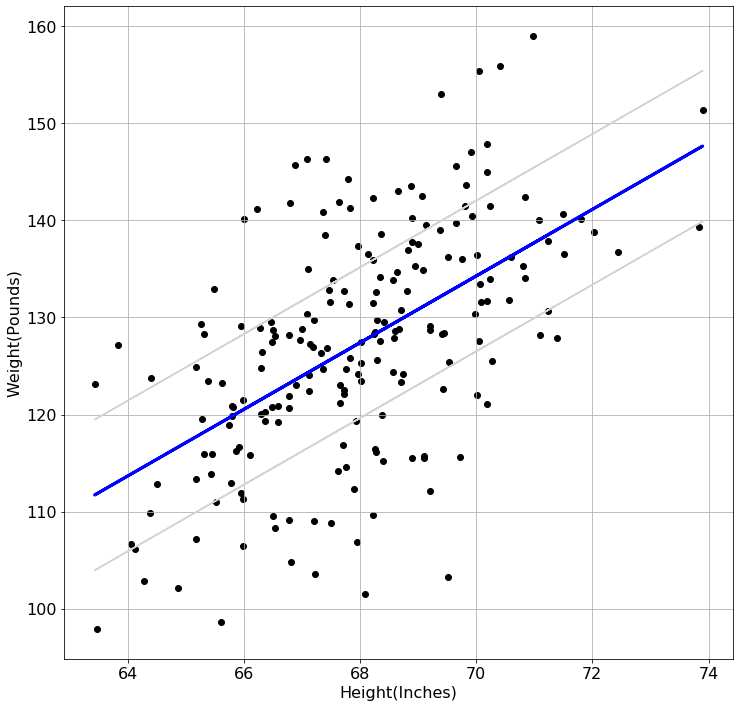

In [10]:
plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 16})
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.plot(x, y_pred + mae, color='lightgray')
plt.plot(x, y_pred - mae, color='lightgray')
plt.title('')
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.grid(True)
plt.show()

**Calculate Pearsons Correlation Coefficient**

In [11]:
corr, pval = pearsonr(x[:,0], y[:,0])
print(corr)

0.5568647346122992

**Two-tailed p-value**

In [12]:
print(pval < 0.05)

True